## 1. Introduction

### Hypothesis:

1. **Preferred Login Device vs. Churn Rate**:  
   *Hypothesis*: Users who access the platform via PC have a higher churn rate compared to those using mobile phones, as PC users may engage less deeply with the platform.

2. **Hours Spent on App vs. Churn Rate**:  
   *Hypothesis*: Users who spend fewer hours on the app per session are more likely to churn, indicating that a lack of engagement is correlated with higher churn rates.

3. **Marital Status vs. Churn Rate**:  
   *Hypothesis*: Single users have a higher churn rate compared to married users, possibly due to differing priorities and engagement levels with the app.

4. **Complaints vs. Churn Rate**:  
   *Hypothesis*: Users who lodge complaints are more likely to churn, suggesting that dissatisfaction or unresolved issues significantly impact customer retention.

5. **Tenure vs. Churn Rate**:  
   *Hypothesis*: Users with shorter tenure periods (e.g., less than 6 months) exhibit higher churn rates, as new users may not have yet formed loyalty or attachment to the platform.

6. **Time Since Last Order vs. Churn Rate**:  
   *Hypothesis*: Users who made their last order more recently are more likely to churn, as this could indicate that they have obtained what they need and may not return to the platform until they have another need, if at all.

7. **Discount Amount vs. Churn Rate**:  
   *Hypothesis*: Users who receive higher discounts are less likely to churn, as discounts may encourage customer loyalty and repeat purchases.

## 2. Data Processing & Cleaning

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# suppress Future Warnings due to diff in library versions...
warnings.simplefilter(action='ignore', category=FutureWarning)

In [115]:
# load CSV file
df = pd.read_csv('/Users/zikun/IS5126_FinalProject/Project Dataset.csv')

df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,MaritalStatus,AgeGroup,Gender,HourSpendOnApp,OrderCount,OrderAmountHikeFromlastYear,DaySinceLastOrder,PreferedOrderCat,NumberOfStreamerFollowed,SatisfactionScore,Complain,CouponUsed,DiscountAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Single,3,Female,3.0,1.0,11.0,5.0,Laptop & Accessory,9,2,1,1.0,160
1,50002,1,NaN,Phone,1,8.0,Single,4,Male,3.0,1.0,15.0,0.0,Household,7,3,1,0.0,121
2,50003,1,NaN,Phone,1,30.0,Single,4,Male,2.0,1.0,14.0,3.0,Household,6,3,1,0.0,120
3,50004,1,3.0,Phone,3,15.0,Single,4,Male,2.0,1.0,23.0,3.0,Laptop & Accessory,8,5,0,0.0,134
4,50005,1,3.0,Phone,1,12.0,Single,3,Male,NaN,1.0,11.0,3.0,Household,3,5,0,1.0,130


In [41]:
# total number of entries before cleaning
print("Total number of entries (rows) before cleaning:", len(df))

Total number of entries (rows) before cleaning: 5630


In [42]:
# check for missing values and data types per column
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
MaritalStatus                    0
AgeGroup                         0
Gender                           0
HourSpendOnApp                 255
OrderCount                     258
OrderAmountHikeFromlastYear    265
DaySinceLastOrder              307
PreferedOrderCat                 0
NumberOfStreamerFollowed         0
SatisfactionScore                0
Complain                         0
CouponUsed                     256
DiscountAmount                   0
dtype: int64


In [85]:
# remove rows with any missing values
df_cleaned = df.dropna()

# remove duplicated entries if any
df_cleaned = df_cleaned.drop_duplicates()

# drop columns that have negative values
columns_to_check = [
    'Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderCount', 
    'OrderAmountHikeFromlastYear', 'DaySinceLastOrder', 'CouponUsed', 
    'DiscountAmount'
]

for column in columns_to_check:
    df_cleaned = df_cleaned[df_cleaned[column] >= 0]

# replace 'Phone' with 'PC' in the 'PreferredLoginDevice' column, because 'Phone' is an error and duplicates the 'Mobile Phone' category
df_cleaned['PreferredLoginDevice'] = df_cleaned['PreferredLoginDevice'].replace('Phone', 'PC')

# verify the changes
print(df_cleaned['PreferredLoginDevice'].value_counts())
print("Total number of entries (rows) after cleaning:", len(df_cleaned))

PreferredLoginDevice
Mobile Phone    1936
Pad             1111
PC               727
Name: count, dtype: int64
Total number of entries (rows) after cleaning: 3774


## 3. Exploratory Data Analysis (EDA)

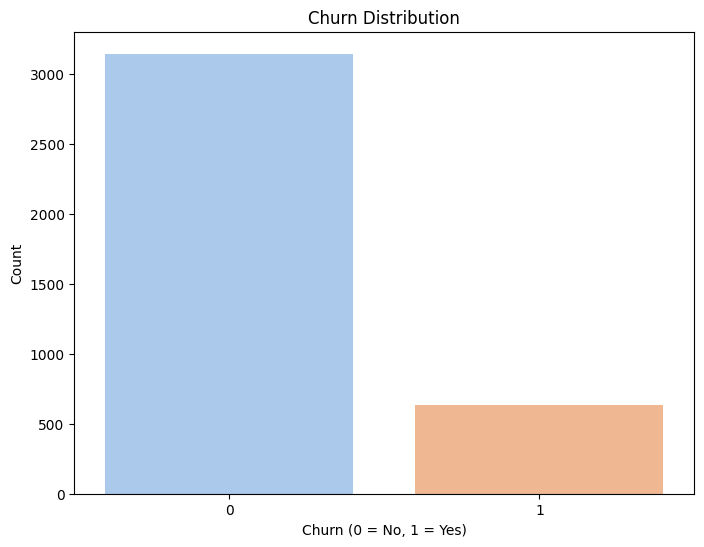

In [82]:
# plot churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df_cleaned, palette='pastel')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

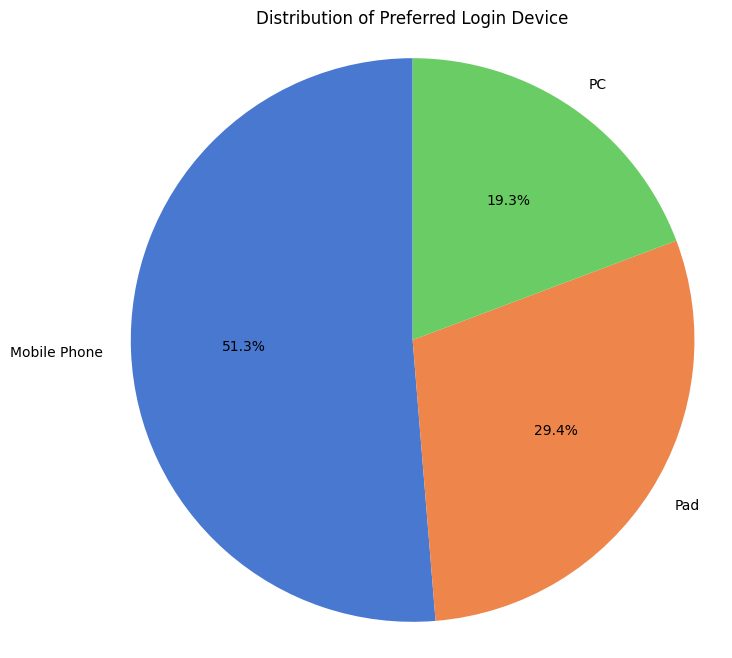

In [86]:
# plot the distribution of PreferredLoginDevice
device_counts = df_cleaned['PreferredLoginDevice'].value_counts()
colors = sns.color_palette('muted')
plt.figure(figsize=(8, 8))
plt.pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Distribution of Preferred Login Device')
plt.axis('equal')
plt.show()

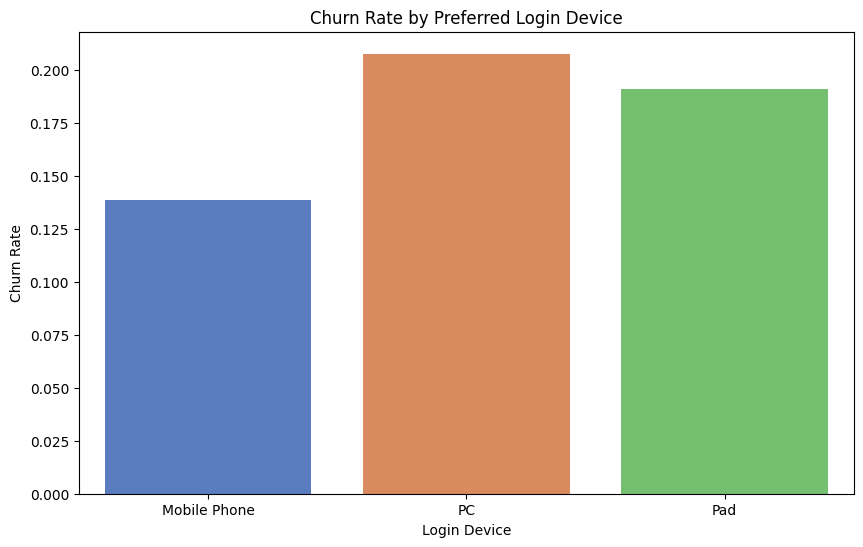

In [87]:
# plot the churn rate by device type
device_churn = df_cleaned.groupby('PreferredLoginDevice')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredLoginDevice', y='Churn', data=device_churn, palette='muted')
plt.title('Churn Rate by Preferred Login Device')
plt.xlabel('Login Device')
plt.ylabel('Churn Rate')
plt.show()

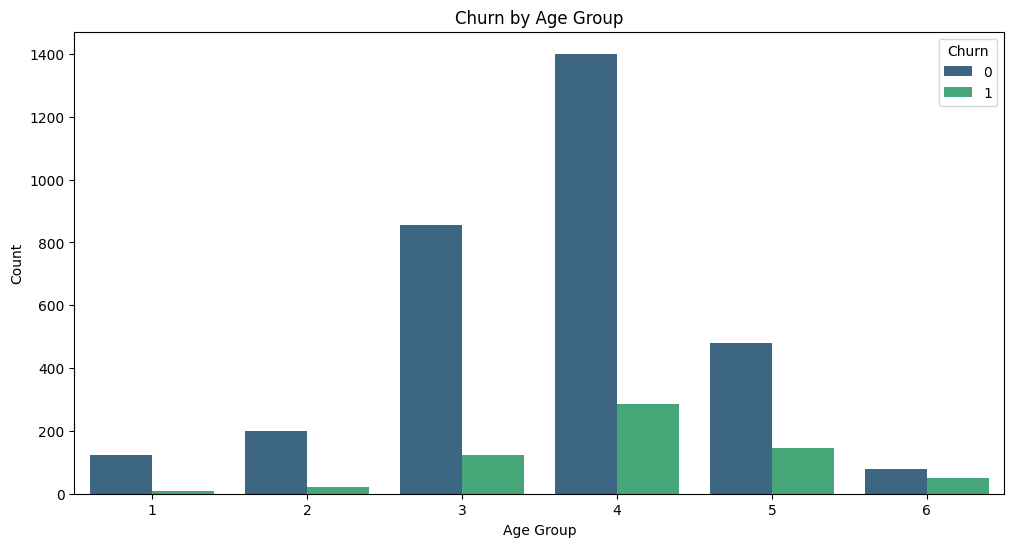

In [88]:
# plot the distribution of churn by age group
plt.figure(figsize=(12, 6))
sns.countplot(x='AgeGroup', hue='Churn', data=df_cleaned, palette='viridis')
plt.title('Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.show()

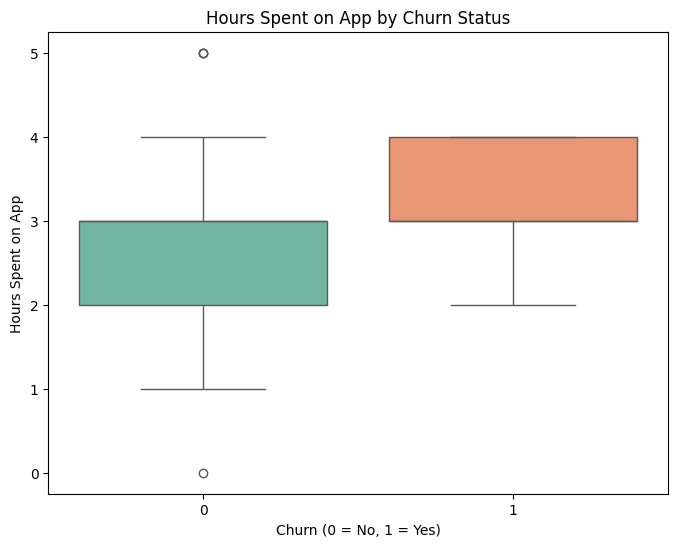

In [102]:
# plot average hours spent on app by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='HourSpendOnApp', data=df_cleaned, palette='Set2')
plt.title('Hours Spent on App by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Hours Spent on App')
plt.show()

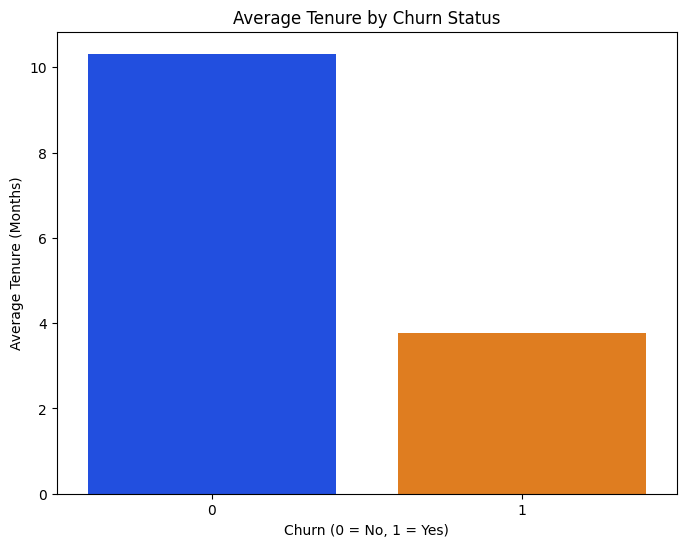

In [103]:
# calculate and plot the average tenure for churned and non-churned users
tenure_churn = df_cleaned.groupby('Churn')['Tenure'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Churn', y='Tenure', data=tenure_churn, palette='bright')
plt.title('Average Tenure by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Tenure (Months)')
plt.show()

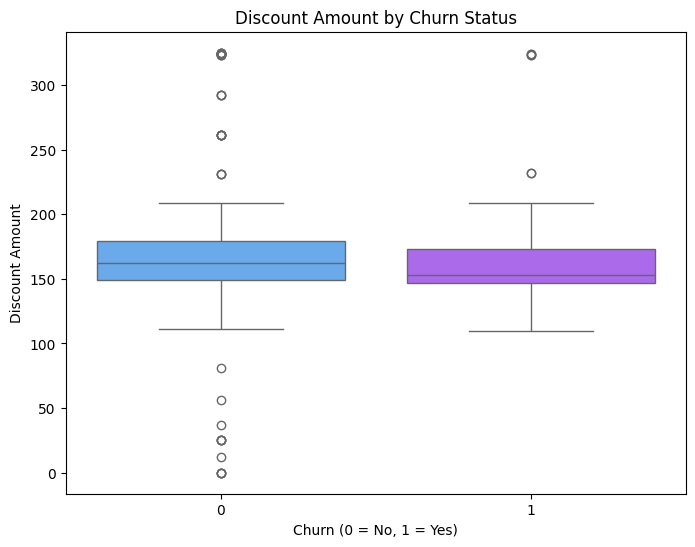

In [104]:
# distribution of discount amount by churn status
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='DiscountAmount', data=df_cleaned, palette='cool')
plt.title('Discount Amount by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Discount Amount')
plt.show()

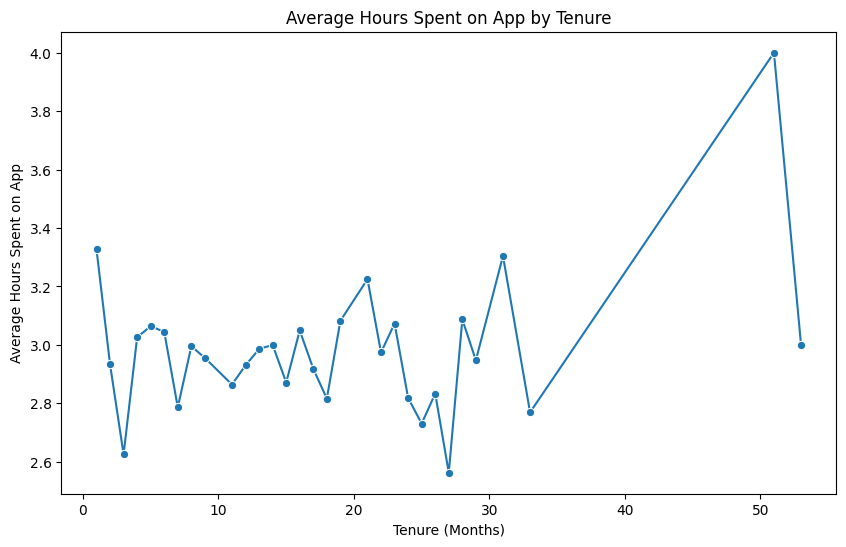

In [105]:
# calculate and plot average hours spent on app per tenure month
avg_hours_per_tenure = df_cleaned.groupby('Tenure')['HourSpendOnApp'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Tenure', y='HourSpendOnApp', data=avg_hours_per_tenure, marker='o')
plt.title('Average Hours Spent on App by Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Average Hours Spent on App')
plt.show()

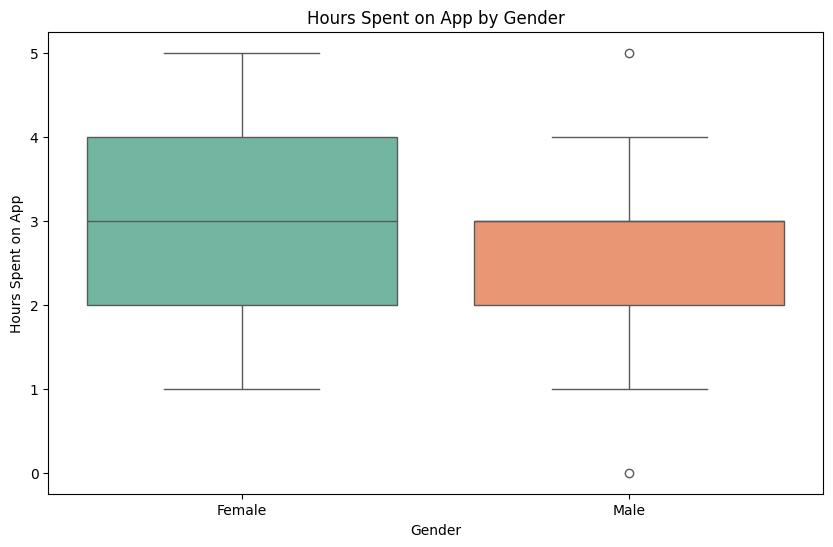

In [106]:
# plot for hours spent on app grouped by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='HourSpendOnApp', data=df_cleaned, palette='Set2')
plt.title('Hours Spent on App by Gender')
plt.xlabel('Gender')
plt.ylabel('Hours Spent on App')
plt.show()

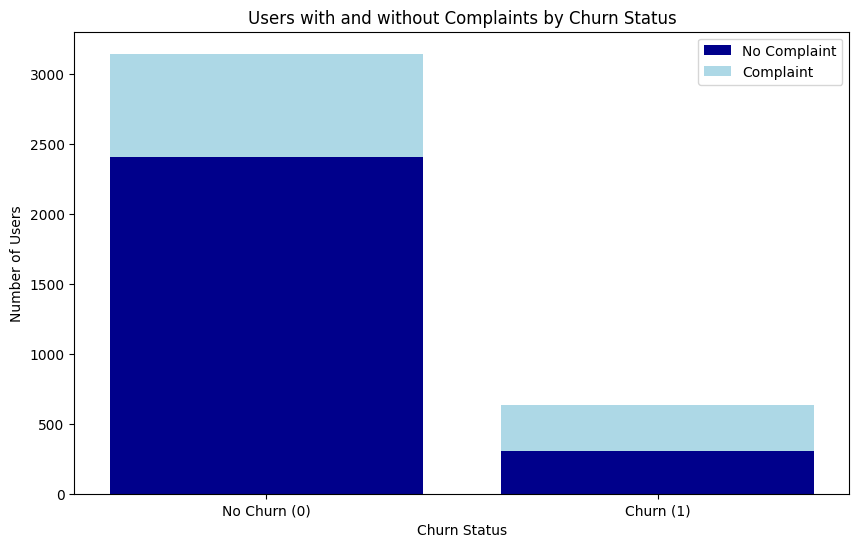

Complaint Rate for Churn = 0 (No Churn): 23.42%
Complaint Rate for Churn = 1 (Churn): 52.14%


In [107]:
# calculate total number of users and those who complained for each churn group
total_users_per_churn = df_cleaned.groupby('Churn')['Complain'].count()
users_complained_per_churn = df_cleaned.groupby('Churn')['Complain'].sum()

# calculate the number of users who did not complain for each churn group
users_not_complained_per_churn = total_users_per_churn - users_complained_per_churn

categories = ['No Churn (0)', 'Churn (1)']

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
bar1 = plt.bar(categories, users_not_complained_per_churn, color='darkblue', label='No Complaint')
bar2 = plt.bar(categories, users_complained_per_churn, bottom=users_not_complained_per_churn, color='lightblue', label='Complaint')

plt.title('Users with and without Complaints by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Number of Users')
plt.legend()
plt.show()

# calculate the complaint rate for each churn group
complaint_rate = (users_complained_per_churn / total_users_per_churn) * 100
print("Complaint Rate for Churn = 0 (No Churn): {:.2f}%".format(complaint_rate[0]))
print("Complaint Rate for Churn = 1 (Churn): {:.2f}%".format(complaint_rate[1]))

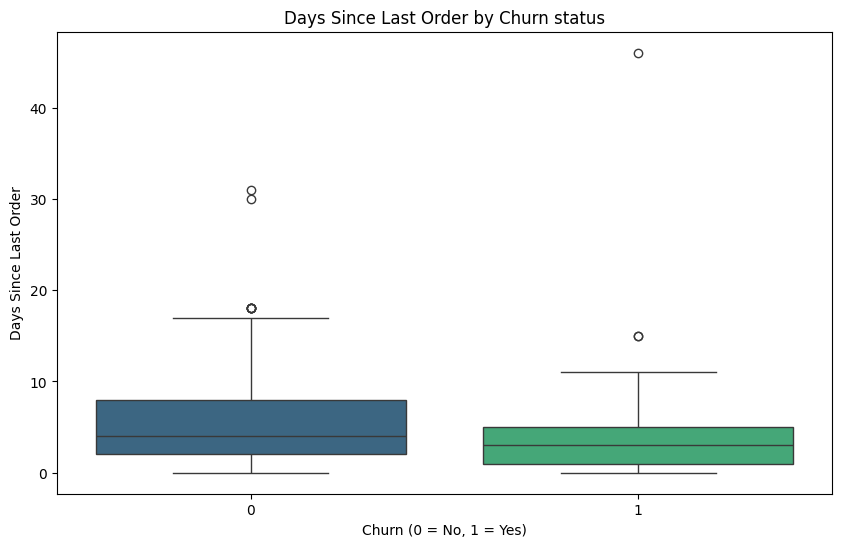

In [108]:
# plot for DaysSinceLastOrder vs churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=df_cleaned, palette='viridis')
plt.title('Days Since Last Order by Churn status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Days Since Last Order')
plt.show()

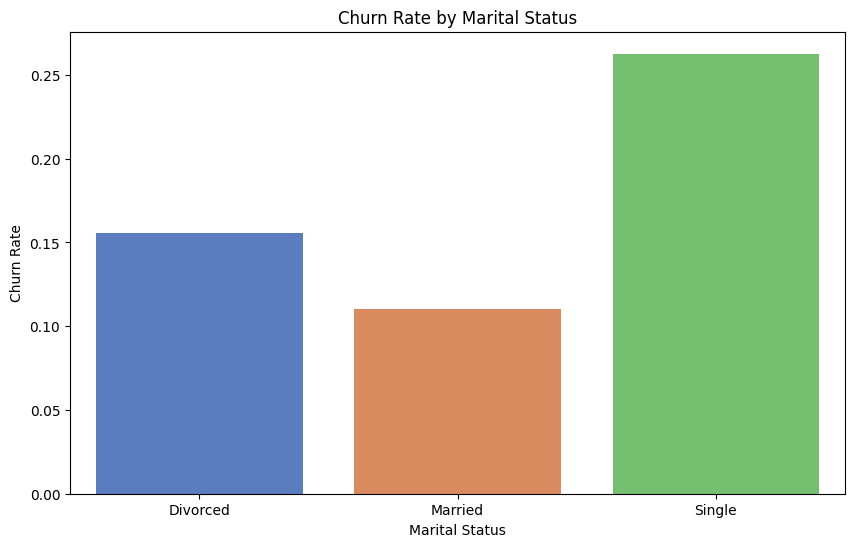

In [109]:
# calculate and plot churn rate for each marital status category
churn_rate_per_marital_status = df_cleaned.groupby('MaritalStatus')['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='MaritalStatus', y='Churn', data=churn_rate_per_marital_status, palette='muted')
plt.title('Churn Rate by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Churn Rate')
plt.show()

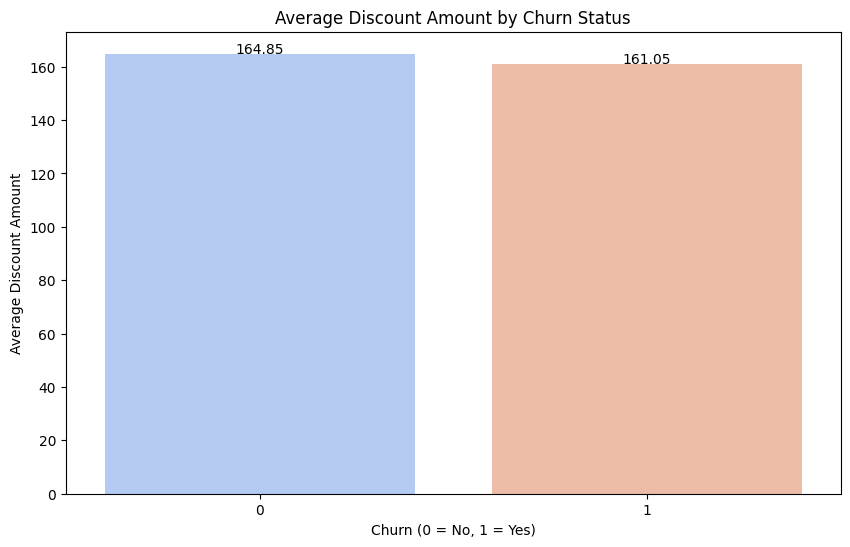

In [113]:
# calculate and plot the average discount amount by churn status
avg_discount_by_churn = df_cleaned.groupby('Churn')['DiscountAmount'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Churn', y='DiscountAmount', data=avg_discount_by_churn, palette='coolwarm')
plt.title('Average Discount Amount by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Average Discount Amount')

for index, row in avg_discount_by_churn.iterrows():
    plt.text(row.name, row['DiscountAmount'] + 0.05, f'{row["DiscountAmount"]:.2f}', 
             color='black', ha="center")

plt.show()